In [65]:
import sys
!{sys.executable} -m pip install arch

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss, adfuller
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR

from scipy import stats

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay


##BITCOIN stationarity Analysis




In [67]:
btcusdt_ticker = "BTC-USD"
start_date = "2017-01-01"
end_date = "2023-06-30"

df = yf.download(btcusdt_ticker, start=start_date, end=end_date)

returns_btc = df
returns_btc['returns'] = df['Adj Close'].pct_change()
returns_btc = returns_btc.dropna()

print(returns_btc.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-02   998.617004  1031.390015   996.702026  1021.750000  1021.750000   
2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966  1043.839966   
2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980  1154.729980   
2017-01-05  1156.729980  1191.099976   910.416992  1013.380005  1013.380005   
2017-01-06  1014.239990  1046.810059   883.943970   902.200989   902.200989   

               Volume   returns  
Date                             
2017-01-02  222184992  0.023464  
2017-01-03  185168000  0.021620  
2017-01-04  344945984  0.106233  
2017-01-05  510199008 -0.122410  
2017-01-06  351876000 -0.109711  


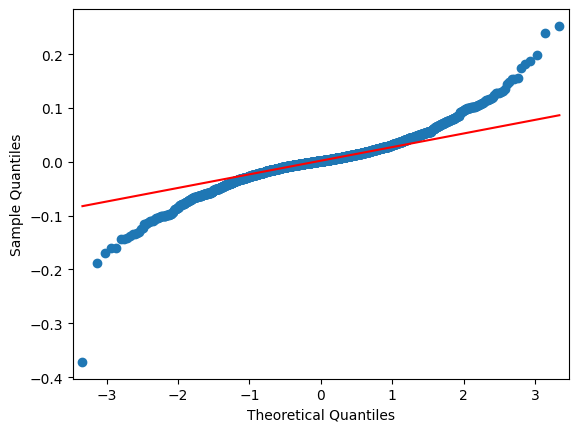

In [68]:
# create Q-Q plot with 45-degree line added to the plot
"""
this plot can be uset for seen the qqplo of:
- returns_btc['Adj Close']
- returns_btc['returns']
"""
fig = sm.qqplot(returns_btc['returns'], line='q')
plt.show()

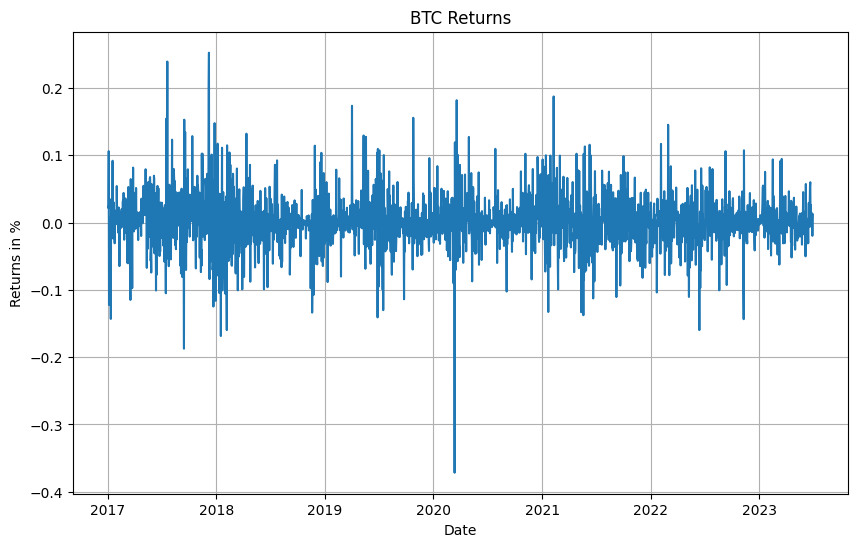

In [69]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(returns_btc['returns'])
plt.title('BTC Returns')
plt.xlabel('Date')
plt.ylabel('Returns in %')
plt.grid(True)
plt.show()

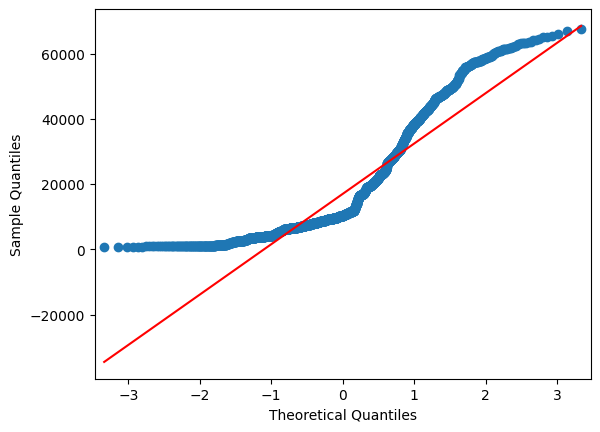

In [70]:
# create Q-Q plot with 45-degree line added to the plot
"""
this plot can be uset for seen the qqplo of:
- returns_btc['Adj Close']
- returns_btc['returns']
"""
fig = sm.qqplot(returns_btc['Adj Close'], line='q')
plt.show()

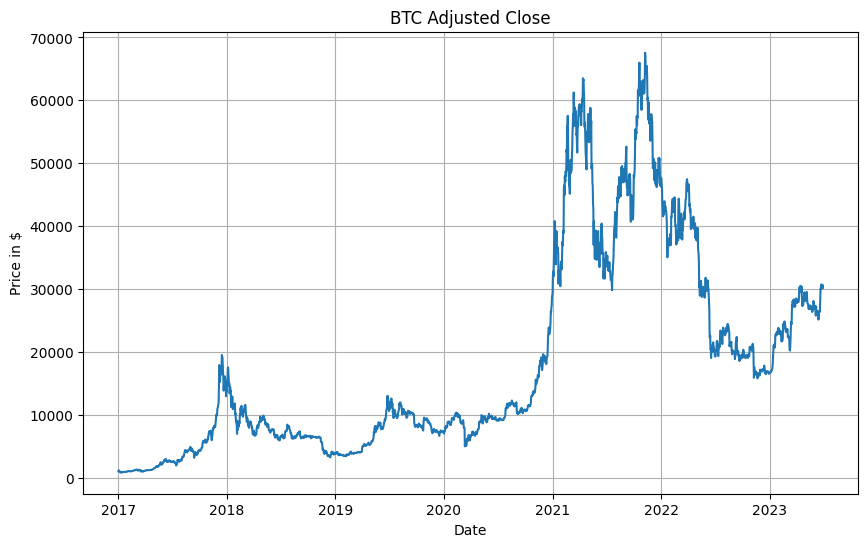

In [71]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(returns_btc['Adj Close'])
plt.title('BTC Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.grid(True)
plt.show()

In [72]:
# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(returns_btc['Adj Close'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                   -1.654998
P-value                           0.454435
#Lags Used                       27.000000
Number of Observations Used    2342.000000
Critical Value (1%)              -3.433145
Critical Value (5%)              -2.862775
Critical Value (10%)             -2.567427
dtype: float64


In [73]:
# Perform Phillips-Perron test
print('Results of Phillips-Perron Test:')
pptest = PhillipsPerron(returns_btc['Adj Close'])
print(pptest.summary().as_text())

Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.526
P-value                         0.520
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [74]:
# Perform KPSS test
print('Results of KPSS Test:')
kpsstest = kpss(returns_btc['Adj Close'])
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','P-value','Lags Used'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of KPSS Test:
Test Statistic                   -1.654998
P-value                           0.454435
#Lags Used                       27.000000
Number of Observations Used    2342.000000
Critical Value (1%)              -3.433145
Critical Value (5%)              -2.862775
Critical Value (10%)             -2.567427
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


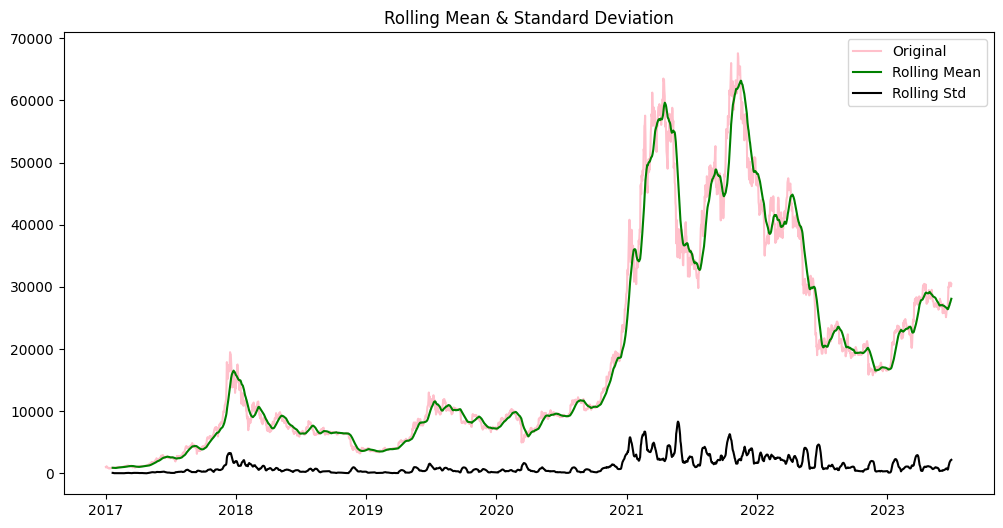

In [75]:
# Calculate rolling statistics
rolmean = returns_btc['Adj Close'].rolling(window=20).mean() # 20-day window
rolstd = returns_btc['Adj Close'].rolling(window=20).std()

# Plot rolling statistics
plt.figure(figsize=(12,6))
plt.plot(returns_btc['Adj Close'], color='pink',label='Original')
plt.plot(rolmean, color='green', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


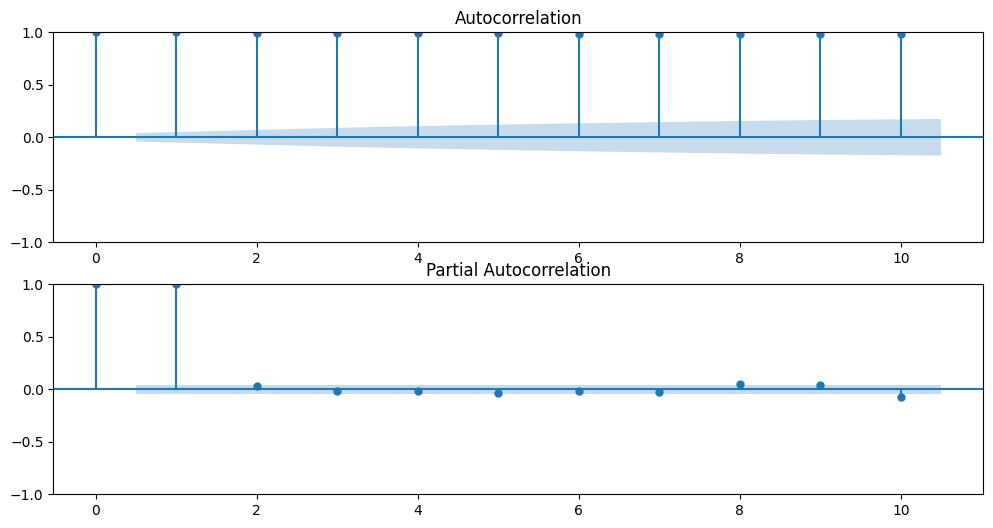

In [76]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(returns_btc['Adj Close'], lags=10, ax=axes[0])
plot_pacf(returns_btc['Adj Close'], lags=10, ax=axes[1])
plt.show()

Dealing with the non-stationarity

In [77]:


# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(returns_btc['returns'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                  -33.678434
P-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    2368.000000
Critical Value (1%)              -3.433115
Critical Value (5%)              -2.862761
Critical Value (10%)             -2.567420
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


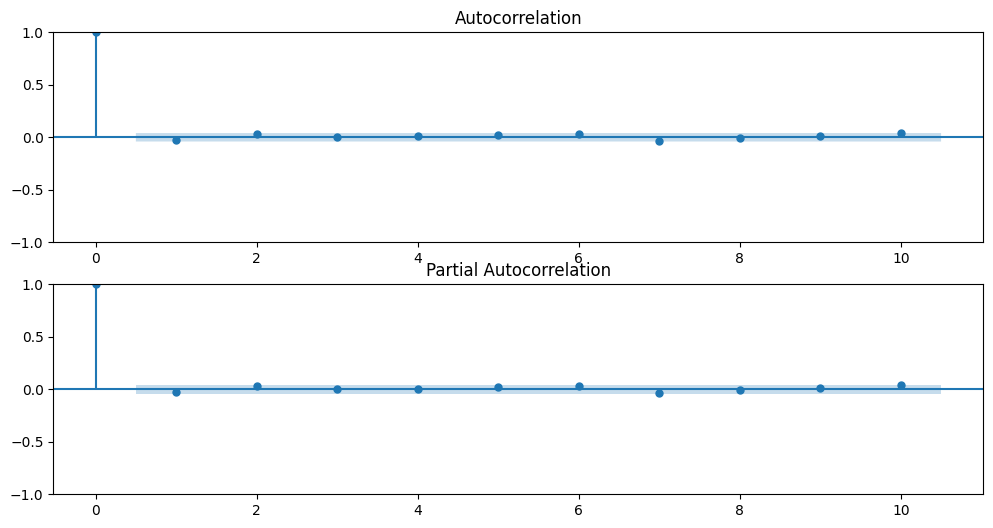

In [78]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(returns_btc['returns'], lags=10, ax=axes[0])
plot_pacf(returns_btc['returns'], lags=10, ax=axes[1])
plt.show()

## NASDAQ 100 stationarity analysis

In [79]:
# ^NDX

nasdaqt_ticker = "^NDX"
start_date = "2017-01-01"
end_date = "2023-06-30"

df = yf.download(nasdaqt_ticker, start=start_date, end=end_date)

nasdaq = df
nasdaq['returns'] = df['Adj Close'].pct_change()
nasdaq = nasdaq.dropna()

print(nasdaq.head())


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-04  4920.790039  4944.740234  4919.799805  4937.209961  4937.209961   
2017-01-05  4936.350098  4967.899902  4935.339844  4964.950195  4964.950195   
2017-01-06  4973.870117  5020.700195  4957.819824  5007.080078  5007.080078   
2017-01-09  5013.819824  5033.319824  5009.450195  5024.899902  5024.899902   
2017-01-10  5027.500000  5049.830078  5016.189941  5035.169922  5035.169922   

                Volume   returns  
Date                              
2017-01-04  1885490000  0.005269  
2017-01-05  1799170000  0.005619  
2017-01-06  1711870000  0.008485  
2017-01-09  1887740000  0.003559  
2017-01-10  1798610000  0.002044  


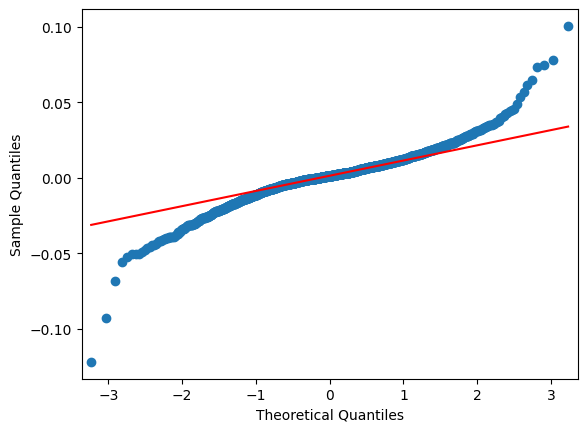

In [80]:
# create Q-Q plot with 45-degree line added to the plot
"""
this plot can be uset for seen the qqplo of:
- nasdaq['Adj Close']
- nasdaq['returns']
"""
fig = sm.qqplot(nasdaq['returns'], line='q')
plt.show()

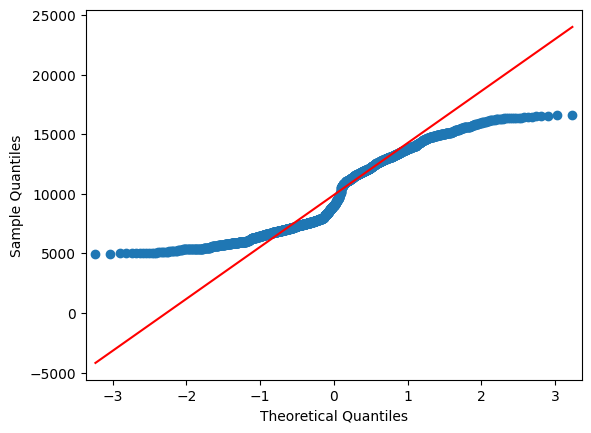

In [81]:
# create Q-Q plot with 45-degree line added to the plot
"""
this plot can be uset for seen the qqplo of:
- nasdaq['Adj Close']
- nasdaq['returns']
"""
fig = sm.qqplot(nasdaq['Adj Close'], line='q')
plt.show()

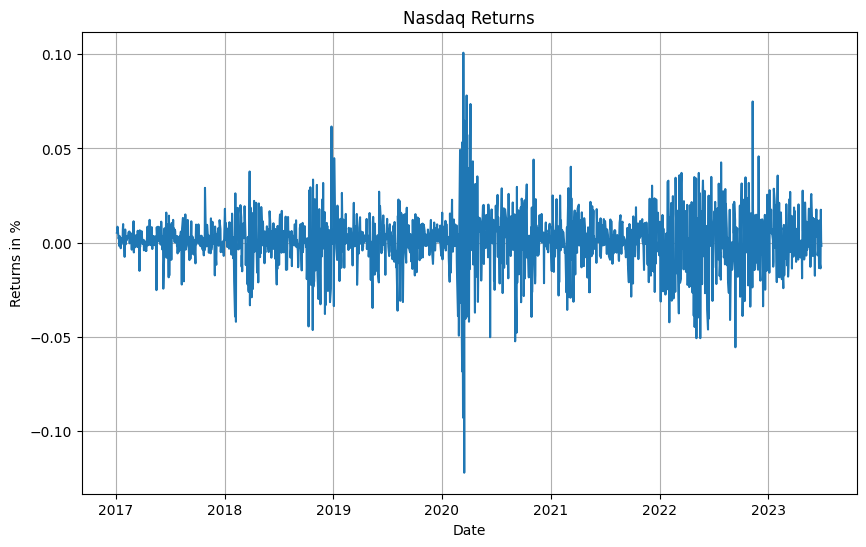

In [82]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(nasdaq['returns'])
plt.title('Nasdaq Returns')
plt.xlabel('Date')
plt.ylabel('Returns in %')
plt.grid(True)
plt.show()

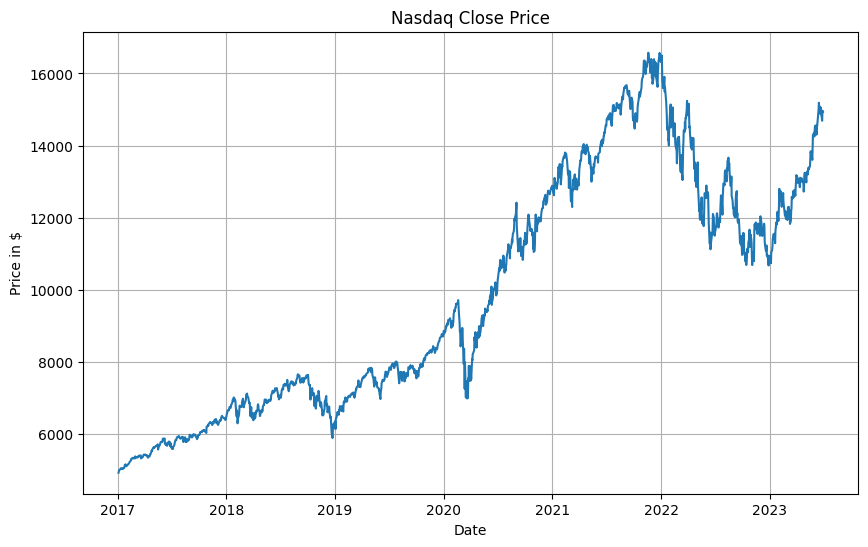

In [83]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(nasdaq['Adj Close'])
plt.title('Nasdaq Close Price')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.grid(True)
plt.show()

In [84]:
# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(nasdaq['Adj Close'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                   -0.893533
P-value                           0.790095
#Lags Used                       11.000000
Number of Observations Used    1620.000000
Critical Value (1%)              -3.434393
Critical Value (5%)              -2.863326
Critical Value (10%)             -2.567721
dtype: float64


In [85]:
# Perform Phillips-Perron test
print('Results of Phillips-Perron Test:')
pptest = PhillipsPerron(nasdaq['Adj Close'])
print(pptest.summary().as_text())

Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.866
P-value                         0.799
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [86]:
# Perform KPSS test
print('Results of KPSS Test:')
kpsstest = kpss(nasdaq['Adj Close'])
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','P-value','Lags Used'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of KPSS Test:
Test Statistic                   -0.893533
P-value                           0.790095
#Lags Used                       11.000000
Number of Observations Used    1620.000000
Critical Value (1%)              -3.434393
Critical Value (5%)              -2.863326
Critical Value (10%)             -2.567721
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


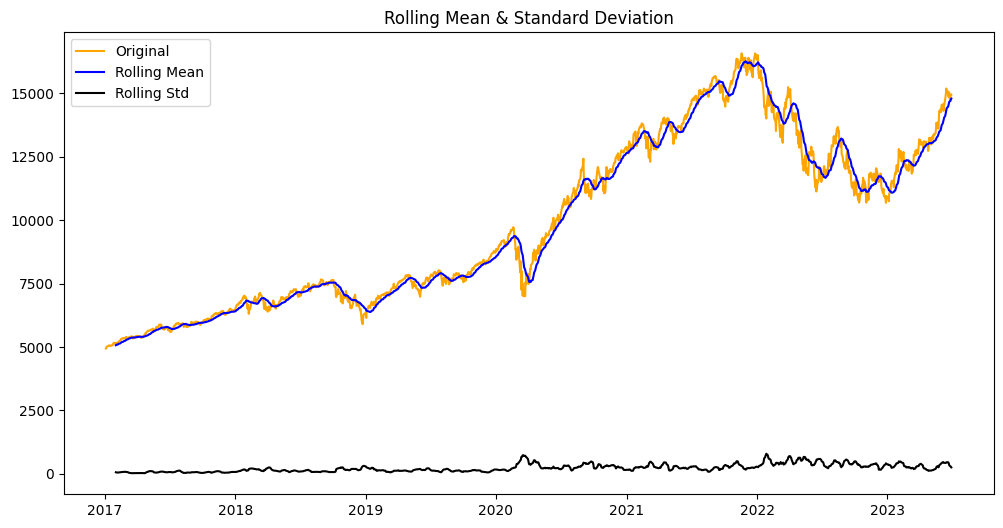

In [87]:
# Calculate rolling statistics
rolmean = nasdaq['Adj Close'].rolling(window=20).mean() # 20-day window
rolstd = nasdaq['Adj Close'].rolling(window=20).std()

# Plot rolling statistics
plt.figure(figsize=(12,6))
plt.plot(nasdaq['Adj Close'], color='orange',label='Original')
plt.plot(rolmean, color='blue', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


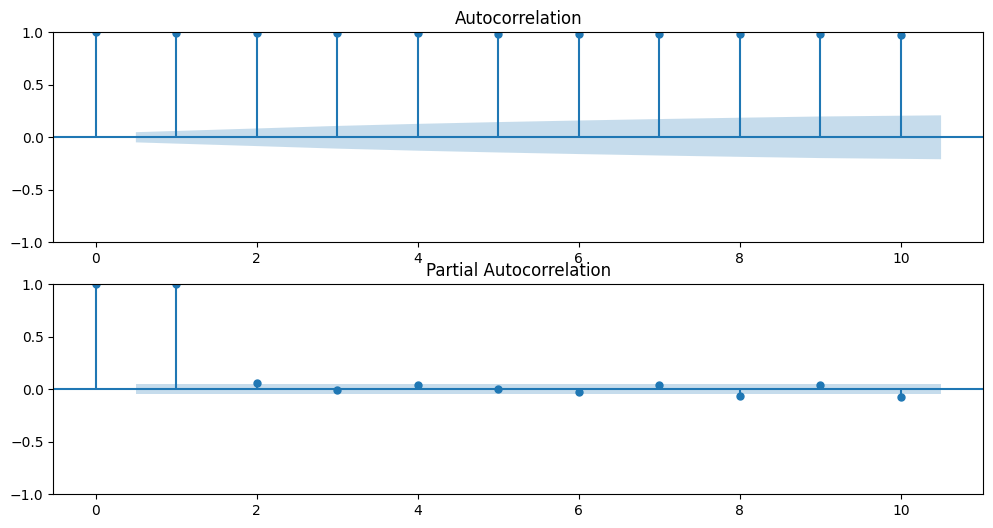

In [88]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(nasdaq['Adj Close'], lags=10, ax=axes[0])
plot_pacf(nasdaq['Adj Close'], lags=10, ax=axes[1])
plt.show()

Let's see after differencing the data

In [89]:
####
nasdaq['Returns'] = nasdaq['Adj Close'].pct_change()
snex_df = nasdaq.dropna()

# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(nasdaq['returns'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                -1.308671e+01
P-value                        1.823511e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.623000e+03
Critical Value (1%)           -3.434386e+00
Critical Value (5%)           -2.863322e+00
Critical Value (10%)          -2.567719e+00
dtype: float64


<ipython-input-89-1de067da623d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq['Returns'] = nasdaq['Adj Close'].pct_change()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


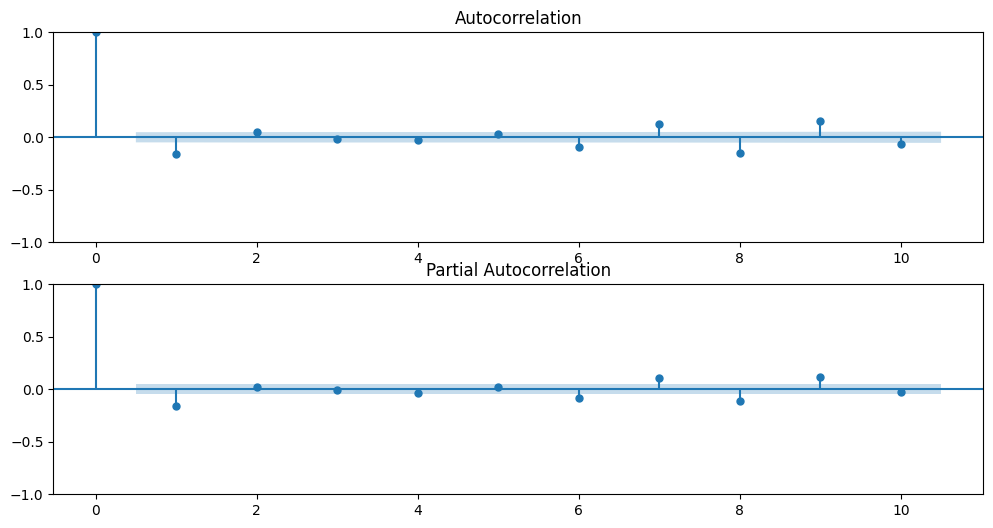

In [90]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(nasdaq['returns'], lags=10, ax=axes[0])
plot_pacf(nasdaq['returns'], lags=10, ax=axes[1])
plt.show()

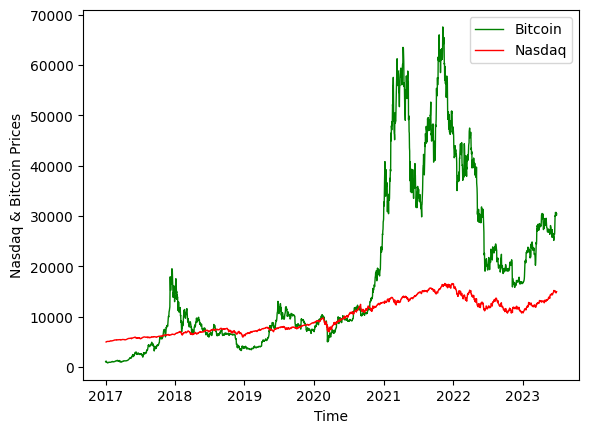

In [91]:
# Bitcoin and Nasdaq Plot
plt.plot(returns_btc['Adj Close'], linewidth=1, c="g", label="Bitcoin")
plt.plot(nasdaq['Adj Close'], linewidth=1, c="r", label="Nasdaq")
plt.xlabel("Time")
plt.ylabel("Nasdaq & Bitcoin Prices")
plt.legend()
plt.show()

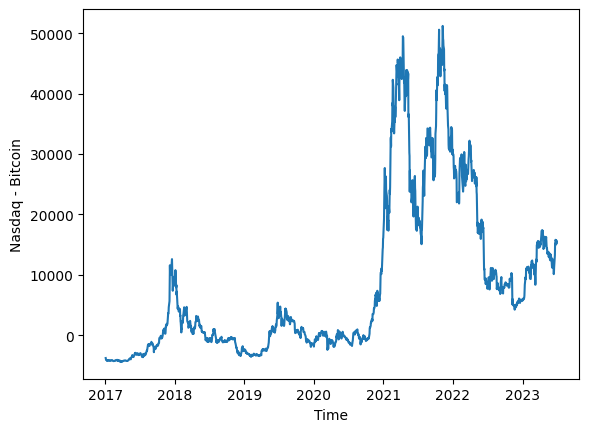

In [92]:
# Difference of Bitcoin and Nasdaq
plt.plot((returns_btc['Adj Close'] - nasdaq['Adj Close']).dropna())
plt.xlabel("Time")
plt.ylabel("Nasdaq - Bitcoin")
plt.show()

In [93]:
# ADF Test Results for Bitcoin
bitcoin_adf = ADF(returns_btc['Adj Close'], trend="n", method="bic")
print(
    "Bitcoin Augmented Dickey-Fuller Unit Root Test\n", bitcoin_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", bitcoin_adf)

# ADF Test Results for Nasdaq
print("\n", "# " * 39, "\n")
nasdaq_adf = ADF(nasdaq['Adj Close'], trend="n", method="bic")
print(
    "Nasdaq Augmented Dickey-Fuller Unit Root Test\n", nasdaq_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", nasdaq_adf)

Bitcoin Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.2375
Date:                Wed, 05 Jul 2023   Prob (F-statistic):                       0.626
Time:                        14:41:17   Log-Likelihood:                         -19517.
No. Observations:                2369   AIC:                                  3.904e+04
Df Residuals:                    2368   BIC:                                  3.904e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

In [94]:
# ADF Test Results for First Difference of Bitcoin
bitcoin_d_adf = ADF(returns_btc['Adj Close'].diff().dropna(), trend="n", method="bic")
print(
    "First Difference of Bitcoin Augmented Dickey-Fuller Unit Root Test\n",
    bitcoin_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", bitcoin_d_adf)

# ADF Test Results for First Difference of Nasdaq
print("\n", "# " * 39, "\n")
nasdaq_d_adf = ADF(returns_btc['Adj Close'].diff().dropna(), trend="n", method="bic")
print(
    "First Difference of Nasdaq Augmented Dickey-Fuller Unit Root Test\n",
    nasdaq_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", nasdaq_d_adf)




First Difference of Bitcoin Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.512
Method:                 Least Squares   F-statistic:                              2486.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):                        0.00
Time:                        14:41:18   Log-Likelihood:                         -19509.
No. Observations:                2368   AIC:                                  3.902e+04
Df Residuals:                    2367   BIC:                                  3.903e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|

In [95]:
idx = returns_btc['Adj Close'].index.intersection(nasdaq['Adj Close'].index)
df1 = returns_btc['Adj Close'].loc[idx]
df2 = nasdaq['Adj Close'].loc[idx]

print(df1.size)
print(df2.size)

1632
1632


In [96]:
btc_close = df1
nasdaq_close = df2

In [97]:
# Two-Step Residual Based Test for Cointegration for AUDUSD and NZDUSD
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        btc_close, nasdaq_close, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -16.827564404433158
P-value: 0.10572855922629953
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 4.4936
Trend: c
Distribution Order: 3


A p-value of 0.11 means that Nasdaq and Bitcoin prices are NOT cointegrated

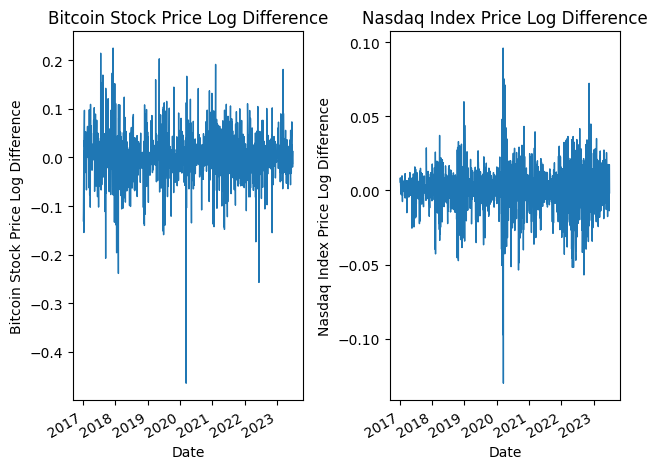

In [98]:
# Time Plots for Differenced Bitcoin, Nasdaq
fig, axs = plt.subplots(1, 2)

log_btc = np.log(btc_close).diff().dropna()
log_btc.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Bitcoin Stock Price Log Difference",
    title="Bitcoin Stock Price Log Difference",
    ax=axs[0],
)

log_nasdaq = np.log(nasdaq_close).diff().dropna()
log_nasdaq.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Nasdaq Index Price Log Difference",
    title="Nasdaq Index Price Log Difference",
    ax=axs[1],
)



fig.tight_layout()
plt.show()

In [99]:
# ADF Test Results for First Difference of logged Bitcoin
log_bitcoin_d_adf = ADF(log_btc.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of Bitcoin Augmented Dickey-Fuller Unit Root Test\n",
    log_bitcoin_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", log_bitcoin_d_adf)

# ADF Test Results for First Difference of logged Nasdaq
print("\n", "# " * 39, "\n")
log_nasdaq_d_adf = ADF(log_nasdaq.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of Nasdaq Augmented Dickey-Fuller Unit Root Test\n",
    log_nasdaq_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", log_nasdaq_d_adf)



First Difference of Bitcoin Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              718.4
Date:                Wed, 05 Jul 2023   Prob (F-statistic):                        0.00
Time:                        14:41:20   Log-Likelihood:                          2605.7
No. Observations:                1619   AIC:                                     -5189.
Df Residuals:                    1608   BIC:                                     -5130.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|

In [100]:
# Two-Step Residual Based Test for Cointegration for AUDUSD and NZDUSD
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        log_btc, log_nasdaq, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -1791.847170562322
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 12.837
Trend: c
Distribution Order: 3


So we can see that the p-value is less than 0.05 so the logged differenced Bitcoin data and the logged differenced Nasdaq data are cointegrated

In [101]:
# Join log time series in one DataFrame
diff_data = pd.concat([log_btc, log_nasdaq], axis=1)
diff_data.columns = ['Logged Bitcoin Price','Logged Nasdaq Price']

# Fit VAR model and run lag selection tool
model = VAR(diff_data)
x = model.select_order(maxlags=12, trend="c")
x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-14.53,-14.52,4.911e-07,-14.52
1,-14.55,-14.53*,4.804e-07,-14.54*
2,-14.55,-14.52,4.804e-07,-14.54
3,-14.55,-14.50,4.815e-07,-14.53
4,-14.54,-14.48,4.832e-07,-14.52
5,-14.54,-14.47,4.850e-07,-14.51
6,-14.54,-14.46,4.828e-07,-14.51
7,-14.55,-14.45,4.780e-07,-14.52
8,-14.56,-14.45,4.730e-07,-14.52
9,-14.57*,-14.45,4.693e-07*,-14.53


In [102]:
# VAR(1) model for Differenced Bitcoin and Nasdaq
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=None,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic=None,  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jul, 2023
Time:                     14:41:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.5261
Nobs:                     1630.00    HQIC:                  -14.5386
Log likelihood:           7235.21    FPE:                4.81695e-07
AIC:                     -14.5460    Det(Omega_mle):     4.79927e-07
--------------------------------------------------------------------
Results for equation Logged Bitcoin Price
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.002148         0.001176            1.827           0.068
L1.Logged Bitcoin Price        -0.009371         0.025621           -0.366           0.715
L1.Lo

In [103]:
# Get the lag order that was selected
lag_order = diff_mod_var.k_ar
print(lag_order)

1


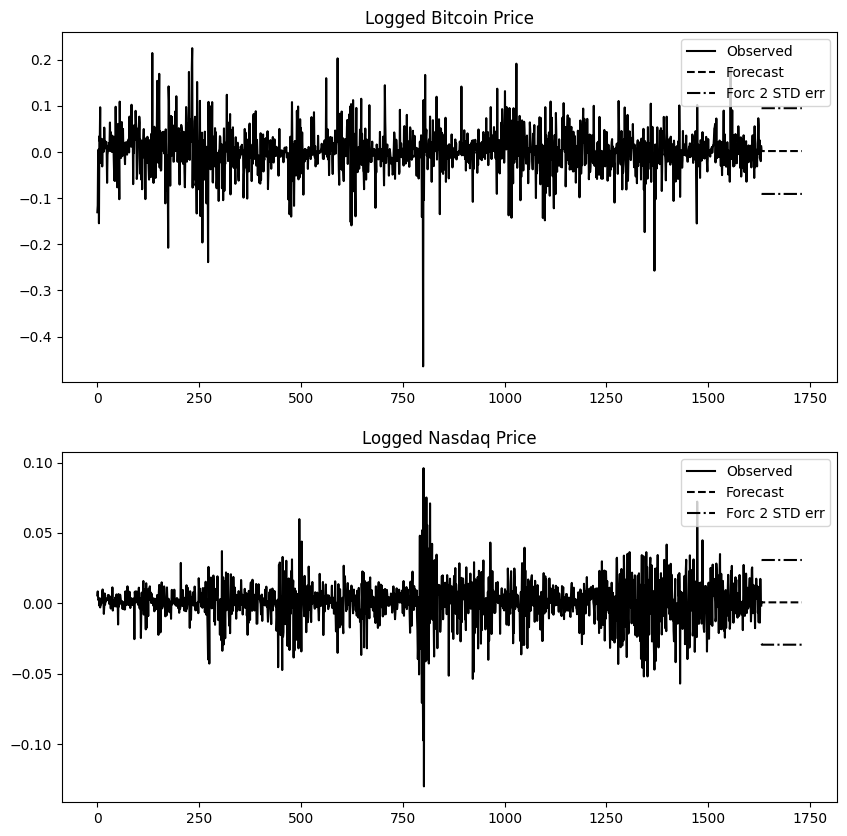

In [104]:
# VAR Model Forecast of the Difference of the Differenced Bitcoin and Nasdaq data
diff_mod_var.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.show()

In [105]:
idx = returns_btc['Adj Close'].index.intersection(nasdaq['Adj Close'].index)
btc_close = returns_btc['Adj Close'].loc[idx]
nasdaq_close = nasdaq['Adj Close'].loc[idx]

print(btc_close.size)
print(nasdaq_close.size)

1632
1632


In [106]:
# Join log time series in one DataFrame
diff_data2 = pd.concat([btc_close, nasdaq_close], axis=1)
diff_data2.columns = [' Bitcoin Price',' Nasdaq Price']

# Fit VAR model and run lag selection tool
model2 = VAR(diff_data2)

# VAR(1) model for Differenced GOOGLE, EURUSD, UST10Y

diff_mod_var2 = model2.fit(
    maxlags=None,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic=None,  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var2.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jul, 2023
Time:                     14:41:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    24.0714
Nobs:                     1631.00    HQIC:                   24.0589
Log likelihood:          -24236.6    FPE:                2.78910e+10
AIC:                      24.0516    Det(Omega_mle):     2.77887e+10
--------------------------------------------------------------------
Results for equation  Bitcoin Price
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  -202.293961       121.823723           -1.661           0.097
L1. Bitcoin Price         0.990447         0.003528          280.764           0.000
L1. Nasdaq Price          0.039843 

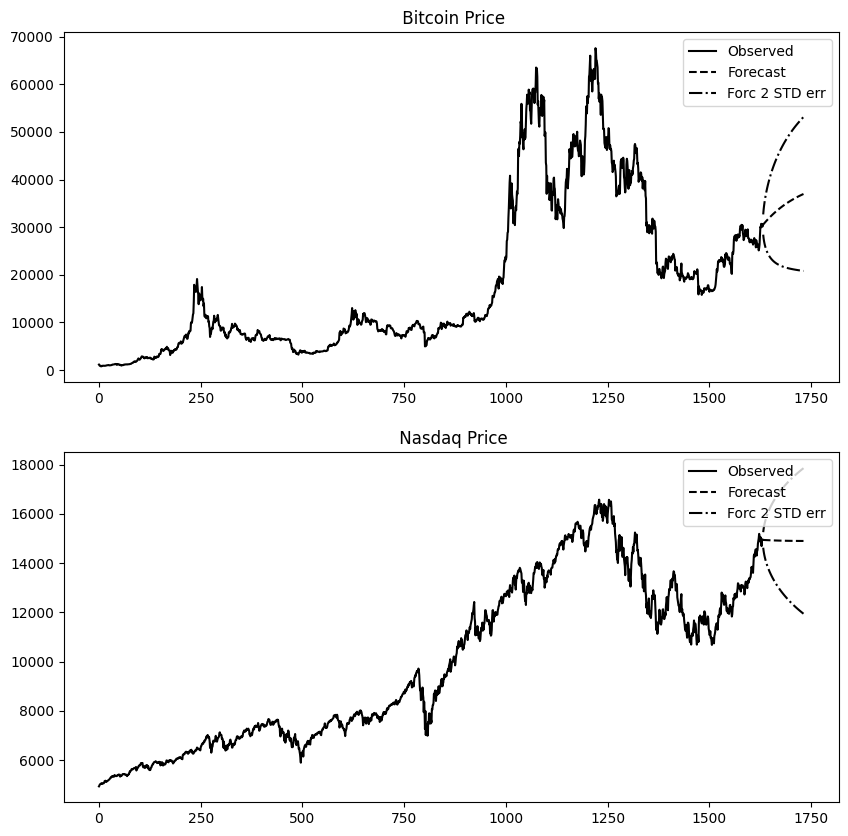

In [107]:
# VAR Model Forecast of the Difference of the Differenced GOOGLE, EURUSD, UST10Y
diff_mod_var2.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.show()

## SNEX Stationarity

### Test For Non-Stationarity


#### Getting the Data


In [108]:
snex_ticker = "SNEX"
start_date = "2017-01-01"
end_date = "2023-06-30"



snex_df = yf.download(snex_ticker, start=start_date, end=end_date)
snex_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,39.990002,40.680000,39.650002,40.410000,40.410000,115300
2017-01-04,40.470001,41.099998,40.189999,40.860001,40.860001,80600
2017-01-05,40.799999,40.799999,38.639999,38.770000,38.770000,127100
2017-01-06,38.529999,39.180000,38.389999,38.709999,38.709999,101500
2017-01-09,38.580002,38.840000,38.000000,38.330002,38.330002,116300


#### Plotting the Data

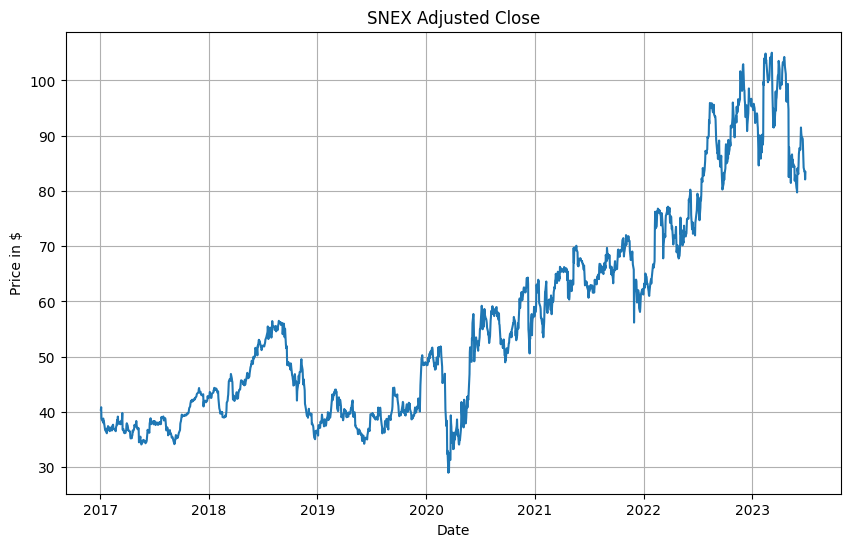

In [109]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(snex_df['Adj Close'])
plt.title('SNEX Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.grid(True)
plt.show()

Let's plot the return of the Adjusted Close and the quantile of the return.

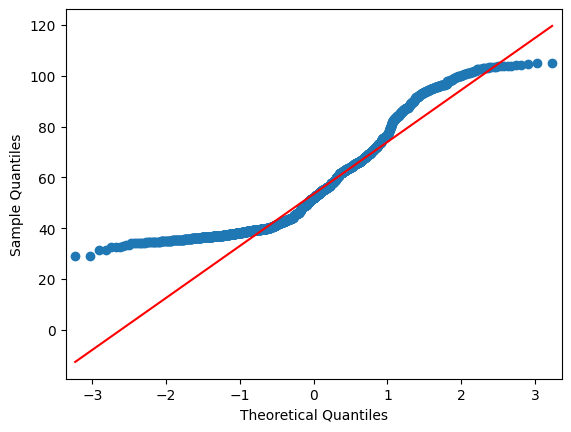

In [110]:
# create Q-Q plot with 45-degree line added to the plot

fig = sm.qqplot(snex_df['Adj Close'], line='q')
plt.show()

#### Performing Statistics Test



In [111]:
# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(snex_df['Adj Close'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                   -1.050024
P-value                           0.734585
#Lags Used                       10.000000
Number of Observations Used    1622.000000
Critical Value (1%)              -3.434388
Critical Value (5%)              -2.863324
Critical Value (10%)             -2.567720
dtype: float64


In [112]:
# Perform Phillips-Perron test
print('Results of Phillips-Perron Test:')
pptest = PhillipsPerron(snex_df['Adj Close'])
print(pptest.summary().as_text())

Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.035
P-value                         0.740
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [113]:
# Perform KPSS test
print('Results of KPSS Test:')
kpsstest = kpss(snex_df['Adj Close'])
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','P-value','Lags Used'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of KPSS Test:
Test Statistic                   -1.050024
P-value                           0.734585
#Lags Used                       10.000000
Number of Observations Used    1622.000000
Critical Value (1%)              -3.434388
Critical Value (5%)              -2.863324
Critical Value (10%)             -2.567720
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### Plotting Statistics Test



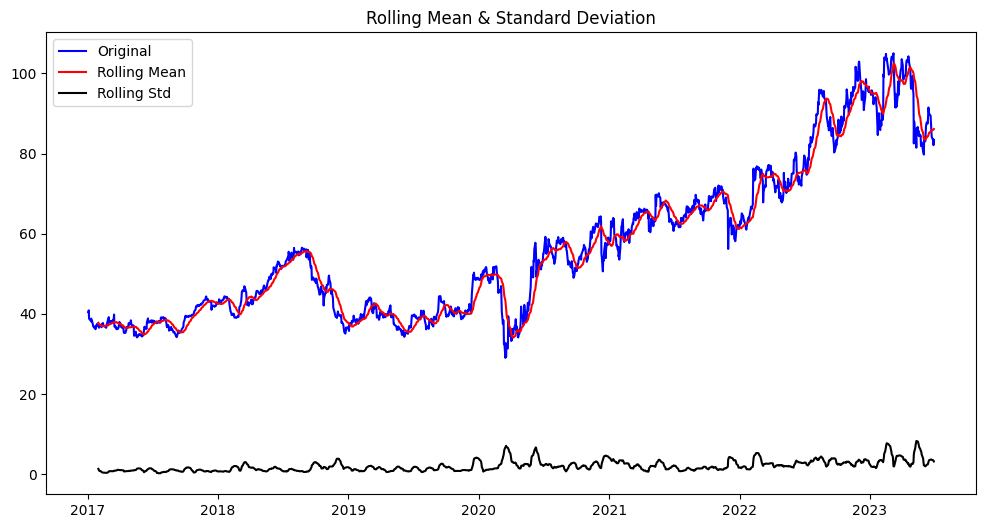

In [114]:
# Calculate rolling statistics
rolmean = snex_df['Adj Close'].rolling(window=20).mean() # 20-day window
rolstd = snex_df['Adj Close'].rolling(window=20).std()

# Plot rolling statistics
plt.figure(figsize=(12,6))
plt.plot(snex_df['Adj Close'], color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


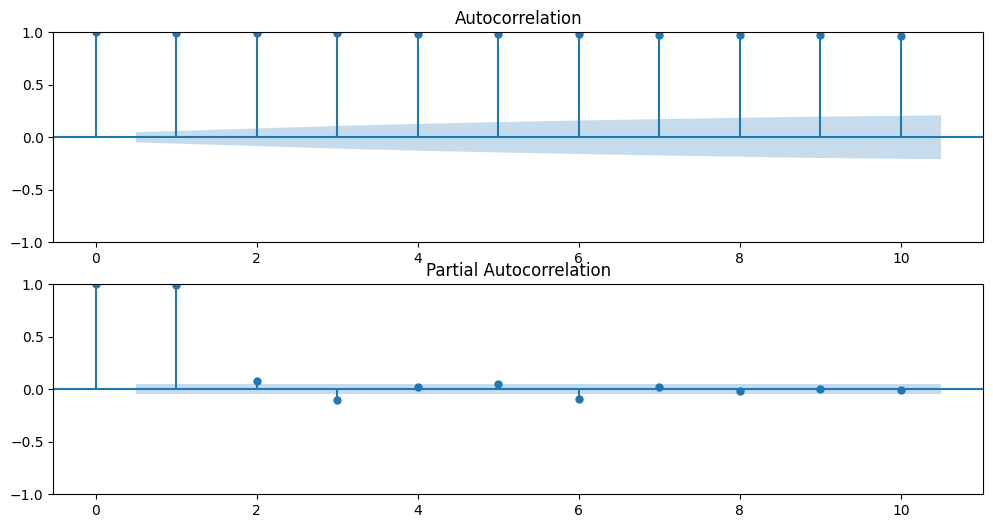

In [115]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(snex_df['Adj Close'], lags=10, ax=axes[0])
plot_pacf(snex_df['Adj Close'], lags=10, ax=axes[1])
plt.show()

## Address Non-Stationarity

#### Differencing to make the series stationary

In [116]:
####
snex_df['Returns'] = snex_df['Adj Close'].pct_change()
snex_df = snex_df.dropna()

# Perform ADF test
print('Results of ADF Test:')
dftest = adfuller(snex_df['Returns'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                -1.087398e+01
P-value                        1.346233e-19
#Lags Used                     1.300000e+01
Number of Observations Used    1.618000e+03
Critical Value (1%)           -3.434398e+00
Critical Value (5%)           -2.863328e+00
Critical Value (10%)          -2.567722e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


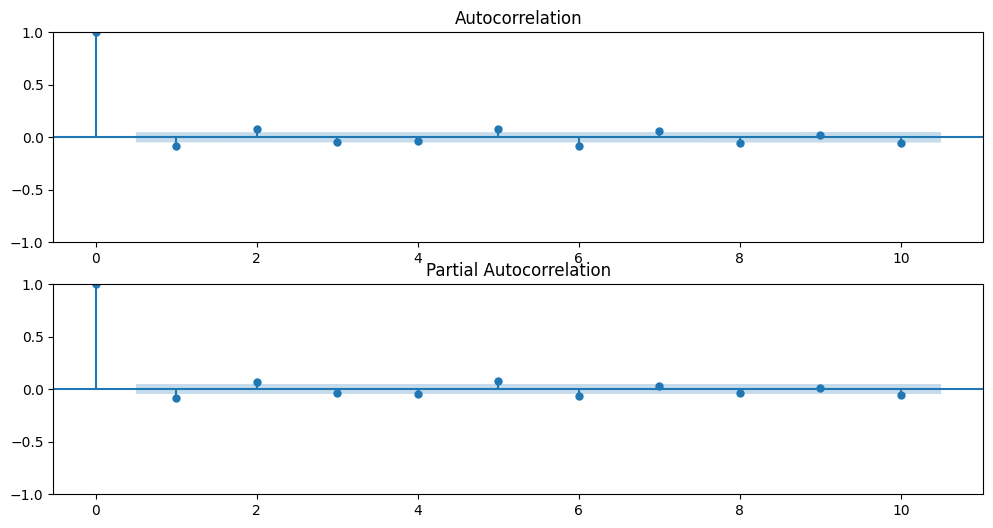

In [117]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(snex_df['Returns'], lags=10, ax=axes[0])
plot_pacf(snex_df['Returns'], lags=10, ax=axes[1])
plt.show()

## BONUS Model